<a href="https://colab.research.google.com/github/hellocybernetics/TensorFlow_Eager_Execution_Tutorials/blob/master/tutorials/01_basics/feed_forward_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install tf-nightly-2.0-preview

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("seaborn")

In [12]:
L = tf.keras.layers

In [13]:
def toy_data():
    x = np.linspace(-2, 2, 100).reshape(-1, 1)
    a1 = -3
    a2 = -2
    a3 = 2
    b = 1
    y = a1*x + a2*x**2 + a3*x**3 + 3*np.random.randn(100, 1)
    return x, y

x, y = toy_data()

$$
\begin{align}
y &= -3x -2x^2 + 2x^3 + 3\epsilon \\
\epsilon &\sim N(0, 1)
\end{align}
$$

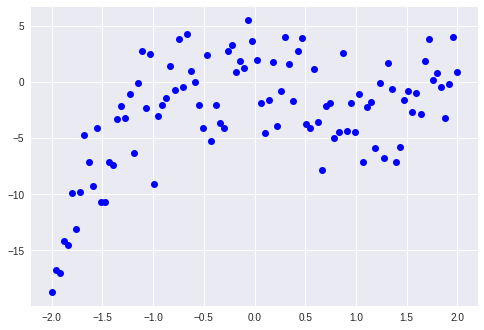

In [14]:
# polynomial
plt.plot(x, y, "bo")

In [15]:
x_train = tf.convert_to_tensor(x, dtype=tf.float32)
y_train = tf.convert_to_tensor(y, dtype=tf.float32)

#### モデル1
3層パーセプトロンで活性化関数ReLU

#### モデル2
3層パーセプトロンで活性化関数tanh

In [16]:
learning_rate = 1e-4
hidden_size = 10

model_relu = tf.keras.Sequential([
    L.Dense(hidden_size, activation="relu"),
    L.Dense(hidden_size, activation="relu"),
    L.Dense(1),
])

model_tanh = tf.keras.Sequential([
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(hidden_size, activation="tanh"),
    L.Dense(1),
])

def loss_fn(model, x, y):
    y_ = model(x)
    return tf.keras.losses.mean_squared_error(y, y_)

optimizer = tf.keras.optimizers.SGD(learning_rate)

In [17]:
for i in range(1000):
    # training model_relu
    with tf.GradientTape(persistent=True) as tape:
        loss_relu = loss_fn(model_relu, x_train, y_train)
        loss_tanh = loss_fn(model_tanh, x_train, y_train)
    
    grads_relu = tape.gradient(loss_relu, model_relu.variables)
    grads_tanh = tape.gradient(loss_tanh, model_tanh.variables)
    
    optimizer.apply_gradients(zip(grads_relu, model_relu.variables))
    optimizer.apply_gradients(zip(grads_tanh, model_tanh.variables))
       
    if (i + 1) % 100 == 0:
        print("epoch ", i + 1)
        print("loss_relu : {}".format(loss_relu.numpy().mean()))
        print("loss_tanh : {}".format(loss_tanh.numpy().mean()))        

epoch  100
loss_relu : 11.385873794555664
loss_tanh : 18.189977645874023
epoch  200
loss_relu : 9.858541488647461
loss_tanh : 10.45016860961914
epoch  300
loss_relu : 9.27541732788086
loss_tanh : 9.092321395874023
epoch  400
loss_relu : 8.984872817993164
loss_tanh : 8.585498809814453
epoch  500
loss_relu : 8.657764434814453
loss_tanh : 8.401622772216797
epoch  600
loss_relu : 8.443976402282715
loss_tanh : 8.336479187011719
epoch  700
loss_relu : 8.336174011230469
loss_tanh : 8.303749084472656
epoch  800
loss_relu : 8.285758972167969
loss_tanh : 8.343177795410156
epoch  900
loss_relu : 8.258354187011719
loss_tanh : 8.248286247253418
epoch  1000
loss_relu : 8.244207382202148
loss_tanh : 8.238754272460938


In [18]:
y_predict_relu = model_relu(x_train).numpy()
y_predict_tanh = model_tanh(x_train).numpy()

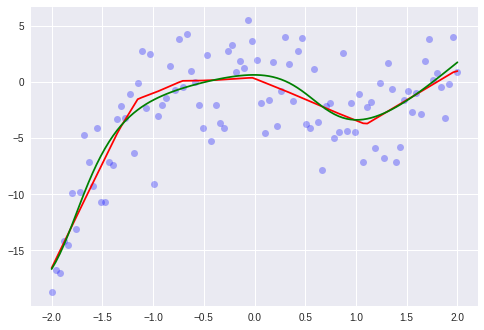

In [19]:
# polynomial data
plt.plot(x, y, "bo", alpha=0.3)
# model_relu predict
plt.plot(x, y_predict_relu, color="r")
# model_tanh predict
plt.plot(x, y_predict_tanh, color="g")